# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("D:/Users/sakthi/Documents/ML/Data Files/1. ST Academy - Crash course and Regression files/House_price.csv",header=0)
#df = pd.read_csv("D:/Users/sakthi/Documents/ML/Data Files/1. ST Academy - Crash course and Regression files/House_price.csv",header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  rainfall     506 non-null    int64  
 15  parks        506 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 63.4 KB


In [4]:
#pd.get_dummies(df)

In [5]:
df['n_hos_beds'].fillna(value = df['n_hos_beds'].mean(),inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  rainfall     506 non-null    int64  
 15  parks        506 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 63.4 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  rainfall     506 non-null    int64  
 15  parks        506 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 63.4 KB


In [8]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.108880,0.023122,-0.047426,-0.391574
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,-0.289946,0.455621,0.017371,0.013518,0.059204,0.383235
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,0.005799,-0.000839,0.055810,0.707635
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.049553,-0.004882,0.092104,0.915544
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.032009,0.030674,-0.064694,-0.282817
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,-0.021012,0.009380,0.075198,0.673850
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,-0.030365,-0.014463,-0.036794,-0.706319
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,-0.031071,-0.010239,-0.038005,-0.708237
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,-0.028315,-0.010077,-0.041470,-0.709346
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,-0.021534,-0.005850,-0.032542,-0.703508


In [9]:
x = sm.add_constant(df['room_num'])
lm = sm.OLS(df['price'],x).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.31e-74
Time:                        14:07:21   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
y_axis = df['price']
x_axis = df[['room_num']]
lm2 = LinearRegression()
lm2.fit(x_axis,y_axis)

LinearRegression()

In [13]:
print(lm2.intercept_,lm2.coef_)

-34.6592431230972 [9.09966966]


In [14]:
lm2.predict(x_axis)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

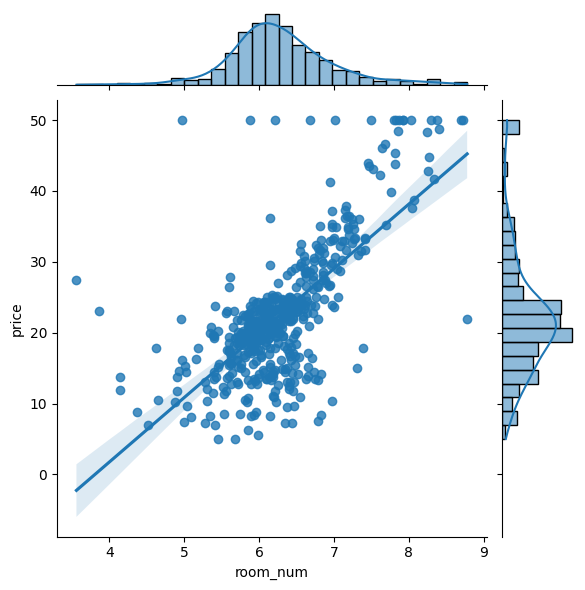

In [15]:
sns.jointplot(x=df['room_num'],y=df['price'],data=df,kind = 'reg')

# Multiple Linear Regression

In [16]:
x_multi = df.drop("price",axis=1);
x_multi =x_multi.drop("n_hos_beds",axis=1)
y_multi = df['price'];

In [17]:
x_const = sm.add_constant(x_multi)

In [18]:
lm_multi = sm.OLS(y_multi,x_const).fit() 

In [19]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     89.11
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          7.20e-125
Time:                        14:07:32   Log-Likelihood:                -1519.5
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     491   BIC:                             3132.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5293      4.966     -0.509      0.611     -12.286       7.227
crime_rate     -0.0734      0.030     -2.440      0.015      -0.133      -0.014
resid_area     -0.0459      0.057     -0.803      0.422      -0.158       0.066
air_qual      -20.4018      5.681     -3.591      0.000     -31.564      -9.239
room_num        4.1981      0.421      9.968      0.000       3.371       5.026
age            -0.0046      0.014     -0.339      0.735      -0.031       0.022
dist1          -0.2668      1.856     -0.144      0.886      -3.913       3.379
dist2           0.9718      1.979      0.491      0.624      -2.917       4.860
dist3          -1.8574      1.932     -0.962      0.337      -5.653       1.938
dist4          -0.1320      1.035     -0.128      0.899      -2.165       1.901
teachers        0.9673      0.119      8.122      0.000       0.733       1.201
poor_prop      -0.5505      0.052    -10.574      0.000      -0.653      -0.448
n_hot_rooms     0.0288      0.042      0.680      0.497      -0.054       0.112
rainfall        0.0173      0.018      0.972      0.331      -0.018       0.052
parks          53.2322     51.854      1.027      0.305     -48.650     155.115
==============================================================================
Omnibus:                      211.059   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1111.971
Skew:                           1.773   Prob(JB):                    3.46e-242
Kurtosis:                       9.337   Cond. No.                     2.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
x_const.head()

,const,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hot_rooms,rainfall,parks
0,1.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,11.1920,23,0.049347
1,1.0,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,12.1728,42,0.046146
2,1.0,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,101.1200,38,0.045764
3,1.0,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,11.2672,45,0.047151
4,1.0,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,11.2896,55,0.039474


In [9]:
lm3 = LinearRegression()

In [10]:
lm3.fit(x_multi,y_multi)

LinearRegression()

In [11]:
print(lm3.intercept_,lm3.coef_)

-2.5293261888554888 [-7.34138249e-02 -4.58966953e-02 -2.04018208e+01  4.19809905e+00
 -4.60443001e-03 -2.66781793e-01  9.71775951e-01 -1.85744994e+00
 -1.31984513e-01  9.67291398e-01 -5.50462847e-01  2.87914869e-02
  1.73370776e-02  5.32321600e+01]


In [12]:
lm3.predict(x_multi)

array([31.06061065, 25.82734994, 34.76179093, 30.29156126, 28.89392459,
       26.49322849, 23.42895074, 20.02416219, 11.56130742, 19.33521367,
       19.40832275, 21.46092283, 21.64732209, 20.58754389, 20.97453554,
       20.38206775, 22.24891345, 18.16194844, 18.02304214, 19.05976115,
       12.53225113, 17.70616805, 16.67646353, 14.2493079 , 15.43755774,
       14.46443929, 16.6124805 , 15.79888107, 20.52766253, 21.86054613,
       12.4333718 , 18.35993429, 10.2198956 , 15.04255416, 15.43548582,
       24.1325245 , 22.37097335, 23.08031404, 22.78881142, 29.73927716,
       32.30994244, 29.44203913, 26.29910828, 26.08188576, 23.53426162,
       22.20790126, 20.59518262, 18.99338124,  8.60965947, 17.76970253,
       20.16668291, 23.53962219, 28.11306328, 23.81847775, 15.67775077,
       29.00345902, 23.43888346, 30.61134475, 20.6984207 , 19.51704627,
       16.08088923, 16.85315024, 23.06325226, 21.75413615, 23.97320264,
       28.27626483, 23.99443599, 22.52380565, 18.90465837, 22.27

# Train-Test-Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

In [26]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(404, 14) (404,) (102, 14) (102,)


In [29]:
lm_a = LinearRegression()
lm_a.fit(x_train,y_train)

LinearRegression()

In [30]:
y_test_a = lm_a.predict(x_test)

In [31]:
y_train_a = lm_a.predict(x_train)

## Test the accuracy of test and trained data 

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,y_test_a)

0.530565537030559

In [34]:
r2_score(y_train,y_train_a)

0.7582232171827903

# Ridge - Lasso

In [37]:
from sklearn import preprocessing

In [38]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [39]:
x_train_scale = scaler.transform(x_train)

In [40]:
x_test_scale = scaler.transform(x_test)

In [41]:
from sklearn.linear_model import Ridge

In [50]:
lm_r = Ridge(alpha=0.5)
lm_r.fit(x_train_scale,y_train)

Ridge(alpha=0.5)

In [51]:
r2_score(y_test,lm_r.predict(x_test_scale))

0.5305838843354895

In [46]:
from sklearn.model_selection import validation_curve 

In [52]:
param_space = np.logspace(-2,8,100)

In [53]:
param_space

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [86]:
#train_score,test_score=validation_curve(Ridge(),x_train_scale,y_train,"alpha",param_space,scoring='r2')
train_scores, test_scores = validation_curve(
  Ridge(),
  x_train_scale, 
  y_train,
  param_name="alpha",
  param_range=param_space,
  scoring = "r2"
)

In [101]:
print(train_scores)
test_mean = np.mean(test_scores,axis=1)
train_mean = np.mean(train_scores,axis=1)

[[7.51028076e-01 7.66160913e-01 7.54854282e-01 7.83198285e-01
  7.45931851e-01]
 [7.51028046e-01 7.66160887e-01 7.54854189e-01 7.83198112e-01
  7.45931729e-01]
 [7.51027998e-01 7.66160846e-01 7.54854043e-01 7.83197840e-01
  7.45931539e-01]
 [7.51027922e-01 7.66160783e-01 7.54853814e-01 7.83197414e-01
  7.45931241e-01]
 [7.51027805e-01 7.66160684e-01 7.54853455e-01 7.83196752e-01
  7.45930777e-01]
 [7.51027622e-01 7.66160530e-01 7.54852898e-01 7.83195725e-01
  7.45930060e-01]
 [7.51027338e-01 7.66160292e-01 7.54852037e-01 7.83194146e-01
  7.45928958e-01]
 [7.51026901e-01 7.66159926e-01 7.54850715e-01 7.83191739e-01
  7.45927280e-01]
 [7.51026235e-01 7.66159371e-01 7.54848703e-01 7.83188105e-01
  7.45924752e-01]
 [7.51025229e-01 7.66158536e-01 7.54845676e-01 7.83182689e-01
  7.45920992e-01]
 [7.51023728e-01 7.66157295e-01 7.54841180e-01 7.83174738e-01
  7.45915487e-01]
 [7.51021521e-01 7.66155480e-01 7.54834605e-01 7.83163277e-01
  7.45907575e-01]
 [7.51018329e-01 7.66152869e-01 7.548251

In [102]:
train_mean

array([7.60234681e-01, 7.60234593e-01, 7.60234453e-01, 7.60234235e-01,
       7.60233895e-01, 7.60233367e-01, 7.60232554e-01, 7.60231312e-01,
       7.60229433e-01, 7.60226624e-01, 7.60222486e-01, 7.60216491e-01,
       7.60207983e-01, 7.60196183e-01, 7.60180243e-01, 7.60159331e-01,
       7.60132741e-01, 7.60100018e-01, 7.60061038e-01, 7.60016009e-01,
       7.59965355e-01, 7.59909492e-01, 7.59848500e-01, 7.59781742e-01,
       7.59707450e-01, 7.59622267e-01, 7.59520755e-01, 7.59394833e-01,
       7.59233159e-01, 7.59020433e-01, 7.58736549e-01, 7.58355400e-01,
       7.57842942e-01, 7.57153872e-01, 7.56226161e-01, 7.54972692e-01,
       7.53269604e-01, 7.50941591e-01, 7.47745386e-01, 7.43354044e-01,
       7.37346500e-01, 7.29208896e-01, 7.18355467e-01, 7.04175746e-01,
       6.86109459e-01, 6.63740530e-01, 6.36889560e-01, 6.05676646e-01,
       5.70530317e-01, 5.32135962e-01, 4.91341072e-01, 4.49051517e-01,
       4.06152099e-01, 3.63466660e-01, 3.21749868e-01, 2.81688968e-01,
      

In [100]:
max(test_mean)

0.7427069127884499

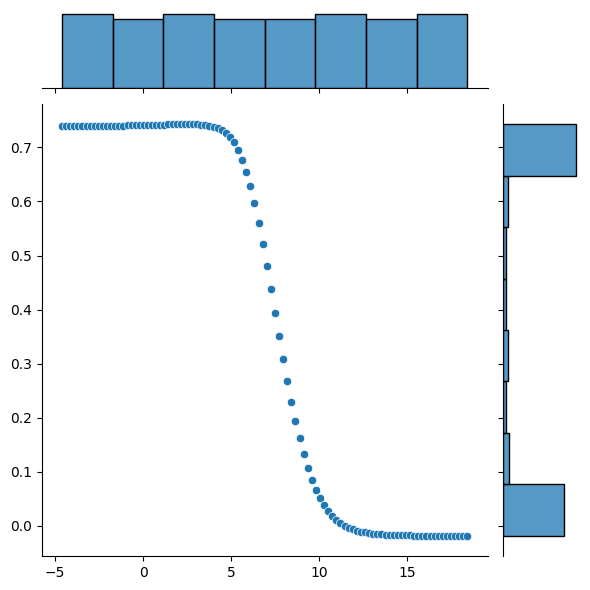

In [108]:
sns.jointplot(x=np.log(param_space),y=test_mean)

In [79]:
from sklearn.linear_model import Lasso

In [81]:
lm_l = Lasso(alpha=0.5)
lm_l.fit(x_train_scale,y_train)
r2_score(y_test,lm_l.predict(x_test_scale))

0.5056321286346557

In [ ]:
from sklearn.model_selection import validation_curve 

In [111]:
param_space = np.logspace(-2,8,100)
param_space

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [109]:
train_score_lasso,test_score_lasso=validation_curve(
    Lasso(),
    x_train_scale,
    y_train,
    param_name="alpha",
    param_range=param_space,
    scoring="r2"
)
test_mean_lasso = np.mean(test_scores,axis=1)
train_mean_lasso = np.mean(train_scores,axis=1)

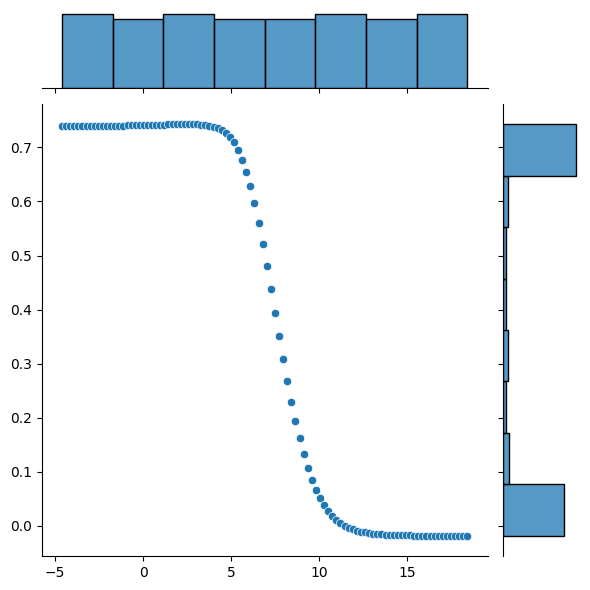

In [110]:
sns.jointplot(x=np.log(param_space),y=test_mean)